# Visualization Dashboard - EDA & Feature Engineering 

### Goals of the project:
1. Create a **cumulative stats profile** for **each** NC State player based on the 17 metrics. Visualize key metric **averages for both season and career**
- % Points won
- % Matches won
- \# Winners
- \# Forced Errors
- \# Unforced Errors
- \# Break Points won
- \# Aces
- \# Double faults
- % First serves in
- % First serves won
- % Second serves in
- % Second serves won
- % 1st Serve returns
- % 2nd Serve returns
- % Short rallies (<5 shots) won
- % Medium rallies (5-8 shots) won
- % Long rallies (>8 shots) won
2. Create a **team leaderboard** for each stat to help visualize which players are **stronger in each area** based on **averages** in each metric.

3. Create a stats profile for each player based on **wins vs losses**. Are we able to **identify key trends** that are different in wins vs losses that might be **predictors of outcome?**

- Insights: Key trends

4. Visualization of **trends over time** for the key metrics for individuals. For example, can we show a **trend line of a player's** first serve % **over their recorded matches?**

- Trend across Seasons
- Trend across chronological matches

5. Visualization of **trends over time** for the key metrics **for the team**. For example, can we show a trend line of a team's first serve % over their recorded matches?

- Trend across Seasons
- Trend across chronological matches

6. Shows **metric vs stats** relative to **indoor vs outdoor** conditions. Are there **significant differences** in any of the key metrics **based on conditions?**



7. Create a **plus/minus ratio for each player**. Using ***Bill Jacobsen Aggressive error margin formula ((Winner + Forced Errors)-unforced errors)***

```
def agg_error(winner, fes, unfes):
    try:
        return ((winner + fes) - unfes)
    except:
        return 0
```

8. Develop a **First serve performance rating** metric. Using ***Craig O’Shannessy formula of first serve percentage multiplied by the decimal of first serve win percentage***.


9. Develop a **manual input interface** for the women's tennis team manager to **update stats and CSV real time** as the season progresses. The goal is to create **snapshots of trends** as the season progresses.

- Python script to generate intermediate file from original dataset
- Tableau Workbook to display all required metrics
- Viewable here: https://public.tableau.com/app/profile/zach.houghtaling/viz/Blue10-NCStateTennis/PlayerDashboard

### Data Dictionary

| Column        | Description                                                                                                         | Type      |
|---------------|---------------------------------------------------------------------------------------------------------------------|-----------|
| matchId       | Match Identifier                                                                                                    | character |
| pointNum      | 5 digit number, 1st digit: character + second and third: game number + last 2 digits: point number                  | character |
| date          | Match Date                                                                                                          | datetime  |
| matchName     | Match Name                                                                                                          | character |
| player        | NC State Player Name                                                                                                | character |
| opp           | Non NC State player name                                                                                            | character |
| set           | Which set the data appears in can be 1,2 or 3                                                                       | integer   |
| setId         | Set Identifier                                                                                                      | character |
| game          | Game Number                                                                                                         | integer   |
| gameId        | Game Identifier                                                                                                     | character |
| setsWon       | Sets Won                                                                                                            | integer   |
| oppSetsWon    | non nc state player sets won                                                                                        | integer   |
| gamesWon      | Games Won                                                                                                           | integer   |
| oppGamesWon   | non nc state player games won                                                                                       | integer   |
| pointsWon     | Points Won                                                                                                          | integer   |
| oppPointsWon  | non nc state player points won                                                                                      | integer   |
| tiebreaker    | Tie Breaker                                                                                                         | boolean   |
| breakPoint    | Break Point                                                                                                         | boolean   |
| gamePoint     | Game Point                                                                                                          | boolean   |
| noAd          | when game score is 40-40 or 3-3 there is a sudden death point in college tennis called no ad or deuce point         | boolean   |
| server        | player who is serving                                                                                               | binary    |
| returner      | player who is returning                                                                                             | binary    |
| score         | nc state players points eg 15,30,40                                                                                 | integer   |
| oppScore      | non nc state players points eg 15,30,40                                                                             | integer   |
| serverScore   | serving player score eg 0,15,30                                                                                     | integer   |
| returnerScore | non serving player score eg 0,15,30                                                                                 | integer   |
| firstServeIn  | was the first serve in play                                                                                         | boolean   |
| outcome       | what happened to end the point, 5 outcomes possible: winner, forced error, unforced error, ace, Fault(double fault) | character |
| errorType     | Error Type with values "Long", "Net", nan (null)                                                                    | character |
| shotType      | Shot Type with values "Backhand", "Forehand", "Volley", nan (null)                                                  | character |
| rallyLength   | number of balls put in play can be 0-infinity                                                                       | integer   |
| pointWonBy    | which player won the point                                                                                          | binary    |
| gameWonBy     | which player won the game                                                                                           | binary    |
| endingPlayer  | which player resulted in the point ending with values 0, 2 <font color='red'>---To be reviewed---</font>                                                         | binary    |
| returnInPlay  | was the first return made by the non serve                                                                          | boolean   |

### Metrics
- % Points won
- % Matches won
- \# Winners
- \# Forced Errors
- \# Unforced Errors
- \# Break Points won
- \# Aces
- \# Double faults
- % First serves in
- % First serves won
- % Second serves in
- % Second serves won
- % 1st Serve returns
- % 2nd Serve returns
- % Short rallies (<5 shots) won
- % Medium rallies (5-8 shots) won
- % Long rallies (>8 shots) won

### Import libraries

In [2]:
from datetime import datetime, timedelta, date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import warnings
warnings.filterwarnings("ignore")

### Read in data

In [3]:
df = pd.read_csv('C:/Users/zacha/OneDrive/Desktop/Classes/Visualization/NcstateSinglesStatReport.csv')
df.shape

(30173, 44)

## Preprocessing

### Observe columns and datatypes

In [4]:
df.columns

Index(['matchId', 'pointNum', 'date', 'matchName', 'player', 'player2', 'opp',
       'opp2', 'set', 'setId', 'game', 'gameId', 'setsWon', 'oppSetsWon',
       'gamesWon', 'oppGamesWon', 'pointsWon', 'oppPointsWon', 'tiebreaker',
       'breakPoint', 'gamePoint', 'noAd', 'server', 'returner', 'score',
       'oppScore', 'serverScore', 'returnerScore', 'firstServeIn', 'outcome',
       'errorType', 'shotType', 'rallyLength', 'pointWonBy', 'gameWonBy',
       'endingPlayer', 'returnInPlay', 'matchType', 'setTo', 'adType',
       'startTime', 'stopTime', 'finalScore', 'matchLink'],
      dtype='object')

In [5]:
df.dtypes.values

array([dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('int64'),
       dtype('O'), dtype('int64'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('bool'), dtype('bool'), dtype('bool'),
       dtype('bool'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('bool'),
       dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('bool'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('O'), dtype('O')], dtype=object)

### Column Data type corrections

In [6]:
char_cols = ['matchId', 'pointNum', 'matchName', 'player', 'opp', 'setId', 'gameId', 'outcome', 'errorType', 'shotType',
            'finalScore']
char_dict = {x: object for x in char_cols}

int_cols = ['set', 'game', 'setsWon', 'oppSetsWon', 'gamesWon', 'oppGamesWon', 'pointsWon', 'oppPointsWon',
           'score', 'oppScore', 'serverScore', 'returnerScore', 'rallyLength']
int_dict = {x: int for x in int_cols}

float_cols = ['startTime', 'stopTime']
float_dict = {x:float for x in float_cols}

bool_cols = ['tiebreaker', 'breakPoint', 'gamePoint', 'noAd', 'firstServeIn', 'returnInPlay']
bool_dict = {x: bool for x in bool_cols}

binary_cols = ['server', 'returner', 'pointWonBy', 'gameWonBy', 'endingPlayer']
binary_dict = {x:object for x in binary_cols}

df = df.astype(char_dict)
df = df.astype(int_dict)
df = df.astype(float_dict)
df = df.astype(bool_dict)
df = df.astype(binary_dict)

df['date'] = pd.to_datetime(df['date']).dt.date
df = df.sort_values(by=['date', 'matchId', 'pointNum']).reset_index(drop=True)

---
### Nulls & Redundant columns

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

matchName     2007
player2      30173
opp2         30173
errorType     7482
shotType      2553
dtype: int64

<font size=3><i>Since all the matches are singles, we can **drop** the `player2`, `opp2` and `matchType` columns</i></font>

In [8]:
df.drop(['player2', 'opp2', 'matchType'], axis=1, inplace=True)

In [9]:
df['adType'].value_counts()

NoAd    30173
Name: adType, dtype: int64

<font size=3><i>Since none of the points have any type of advantage, we can **drop** the `adType` column</i></font>

In [10]:
df.drop('adType', axis=1, inplace=True)


---

### Misrepresented values

In [11]:
print(' <-- '.join(sorted(list(df['player'].unique()))))

Abigail Rencheli <-- Adriana Reami <-- Alana Smith <-- Amanda Rebol <-- Amelia Rajecki <-- Anna Rogers <-- Anna Rogers  <-- Bianca Moldovan <-- Claudia Wiktorin <-- Dylan Cannon <-- Jaeda Daniel <-- Lana Mavor <-- Lexi Keberle <-- Liz Norman <-- Marta Gonzalez <-- Nell Miller <-- Priska Nugroho <-- Sara Nayar <-- Sophie Abrams


<font size=3><i><b>Anna Rogers</b> has two unique values because of a trailing space.<br></i><br>We can eliminate this by stripping the extra space</font>

In [12]:
df['player'] = df['player'].apply(lambda x: str(x).strip())

### Correcting Opposite player names
**Three step process**
1. Strip any trailing and leading spaces
2. Correct capitalization on all names
3. Consider only the last name so multiple values of opposition players are clubbed into one <font color='green'>(Verfied)</font>

In [13]:
print(' <-- '.join(sorted(list(df['opp'].unique()))))

Abigail Rencheli <-- Achong <-- Adams <-- Afanasyeva <-- Aguiar <-- Aleshina <-- Amaro <-- Amelia Rajecki <-- Andreini <-- Aney <-- Angelsjo <-- Angylosy <-- Anika Yarlagadda <-- Anna Brylin <-- Anna Campana <-- Ansari <-- Arsenault <-- Asensi <-- Axon <-- Bakhodirova <-- Bakkari <-- Balasch <-- Berlin <-- Boada <-- Bowtell <-- Bridgeforth <-- Brylin <-- Budin <-- Byrne <-- Cabezas <-- Cameron Morra <-- Campana <-- Cancini <-- Carly Briggs <-- Carol Lee <-- Carolyn Campana <-- Carter <-- Cassie Wooten <-- Castillo <-- Chang <-- Chen <-- Chisholm <-- Cinellatto <-- Ciuca <-- Coppoc <-- Corse <-- Crawley <-- Crowley <-- Culberson <-- Cutura <-- Daavetelia <-- Daniel <-- Daria Kuczer <-- Das <-- Davidescu <-- Davis <-- Dean <-- Delgado <-- Delozire <-- Detkovskaya <-- Diercksen <-- Dillon <-- Dimitrova <-- Disenbergen <-- Dush <-- Earnhardt <-- El Jardi <-- Ele Molinaro <-- Elizabet Danailova <-- Elizarraras <-- Elizarras <-- Emma <-- Erman <-- Flach <-- Garcia <-- Gillas <-- Glossman <--

In [14]:
# Eliminate any leading/trailing spaces
df['opp'] = df['opp'].apply(lambda x: str(x).strip())

# Convert to uniform case with the str.title() function
df['opp'] = df['opp'].apply(lambda x: str(x).title())

# Choose only the last name if there is a space in the name
df['opp'] = df['opp'].apply(lambda x: x.split(' ')[1] if ' ' in x else x)

### Opp Team name correction

In [15]:
random.choice(list(df['matchName'].unique()))

'Daniel, NC State vs Shaikh, Virginia'

In [16]:
# If 'vs' in value, then opposite team name exists
df['oppTeam'] = df['matchName'].apply(lambda x: str(x).split('vs')[1].strip() if 'vs' in str(x) else np.nan)

# If comma in value, then it is of format Player, Team
# Use only the second part to store team name
df['oppTeam'] = df['oppTeam'].apply(lambda x: str(x).split(',')[1].strip() if ',' in str(x) else x)

In [17]:
print(*list(df['oppTeam'].unique()))

ETSU ECU Texas Tech Campbell Utah JMU UNC Louisville Notre Dame Clemson App St Miami Virginia Tech VaTech FSU Florida State Winthrop VCU nan Furman Charlotte South Carolina Van Ureden Florida Kansas Wake Forest Virginia VIrginia Northwestern UCF Gergia Tech Georgia Tech Boston College Syracuse Iowa State NC State Auburn Georgia


### Fix multiple representations of same opponent Team

In [18]:
df['oppTeam'].replace({'Gergia Tech': 'Georgia Tech',
#                        'Georgia': 'Georgia Tech',
                      'VIrginia': 'Virginia',
                       'VaTech': 'Virginia Tech',
                       'Florida State': 'FSU',
#                        'Florida': 'FSU'
                      },
                     inplace = True)

---

### Dates when matches are played

In [19]:
df['matchesPlayed'] = df['matchId'].apply(lambda x: 0 if x==np.nan else 1)
df['matchesPlayed'] = df['matchesPlayed'].cumsum()

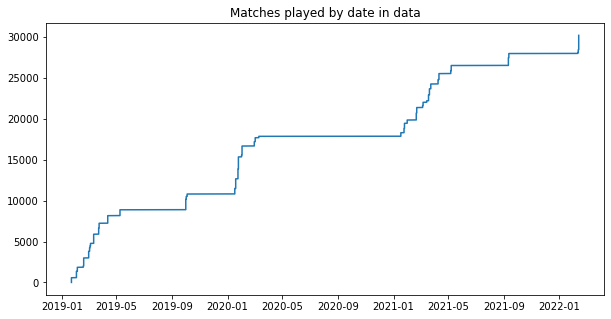

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['matchesPlayed'])
plt.title("Matches played by date in data")
plt.show()

<font size=3><i>The major spikes are the season matches, but <b>minor spikes</b> are matches played in the Sept/Oct period</i><br>
Here, I initially encoded them as "Tournament"<br>
Answer from coach: consider them part of the same season</font>

---

## TO BE FIXED

In [21]:
# Answer from coach Secker: Use Spring + Fall matches as part of the season
# Corrected function to get seasons

def get_seasons(x):
    if x<date(2019, 6, 30):
        return "2018-19"
    elif x<date(2020, 6, 30):
        return "2019-20"
    elif x<date(2021, 6, 30):
        return "2020-21"
    else:
        return "2021-22"


In [22]:
df['season'] = df['date'].apply(get_seasons)

In [23]:
df.groupby('season').agg({'date': ['min', 'max']})

date            
                min         max
season                         
2018-19  2019-01-22  2019-05-09
2019-20  2019-10-01  2020-03-10
2020-21  2021-01-17  2021-05-08
2021-22  2021-09-11  2022-02-13

## Feature Engineering

### RallyLength categorical encoding
The coaches need rallies of length 5-8 classified as "Medium" length rally

In [24]:
df['rallyCat'] = pd.cut(df['rallyLength'], bins = [0, 5, 8, df['rallyLength'].max()], labels = ['short', 'medium', 'long'])
df['rallyCat'] = df['rallyCat'].astype(object)
df['rallyCat'].fillna("unknown", inplace=True)

In [25]:
df['player_season'] = df.groupby('player')['season'].rank(method = 'dense')
df['player_season'] = df['player_season'].astype(int)

In [26]:
df.to_csv('singles_tennis_cleaned1.csv', index=False)

# <span style='color:mediumblue'>Metrics Calculation</span>

## 1. % Points won by Player
- Uses `pointWonBy` column
- Calculates simple ratio of won to total in the game

In [1]:
#ncPointsByMatch = []
#ncServesByMatch = []
#ncFaultByMatch = []
#
#for i in range(len(df['matchId'])):
#    j=0
#    while((df['matchId'][i] != df['matchId'][i+1]) or (i==(len(df['matchId'])-1))):
#        j = j + 1
#    rows = df.loc[i, i+j]
#    df2 = df2.append(rows, ignore_index=True)
#    ncPointsByMatch.append(sum(df2['pointWonBy']==0))
#    ncServesByMatch.append(sum(df2['server']==0))
#    temp = df2[(df2['server'] == 0)]
#    ncFaultByMatch.append(sum(temp['outcome']=='Fault'))
#list_of_tuples = list(zip(df['matchID'].unique(),ncPointsByMatch, ncServesByMatch, ncFaultByMatch))
#matchLevel = pd.DataFrame(list_of_tuples,[['matchID','ncPointsByMatch', 'ncServesByMatch', 'ncFaultByMatch']])
#print(matchLevel)                          

In [32]:
print(sum(df['outcome']=='Fault'))

1755


In [28]:
tob_cols = ['player', 'pointNum', 'endingPlayer', 'pointWonBy', 'server',
            'pointsWon', 'oppPointsWon', 'tiebreaker', 'rallyLength', 'finalScore', 'outcome']

In [29]:
# Keep the last game for every set
point_end = df.drop_duplicates(subset=['setId', 'gameId'], keep='last')

# Account for the point won after game ends
point_end['pointsWon'] = point_end['pointsWon'] + (1 - point_end['pointWonBy'])
point_end['oppPointsWon'] = point_end['oppPointsWon'] + point_end['pointWonBy']

# # Sum the points won by NC State and opposition at the final situation in 
point_end['totalPoints'] = point_end['pointsWon'] + point_end['oppPointsWon']
point_end[tob_cols].head()

,player,pointNum,endingPlayer,pointWonBy,server,pointsWon,oppPointsWon,tiebreaker,rallyLength,finalScore,outcome
5,Amanda Rebol,10005,2,0,1,4,2,False,8,1-6|6-1|6-3,UnforcedError
12,Amanda Rebol,10106,0,1,0,3,4,False,16,1-6|6-1|6-3,UnforcedError
18,Amanda Rebol,10205,2,1,1,2,4,False,25,1-6|6-1|6-3,Winner
25,Amanda Rebol,10306,2,1,0,3,4,False,2,1-6|6-1|6-3,ForcedError
32,Amanda Rebol,10406,2,1,1,3,4,False,9,1-6|6-1|6-3,Winner


In [30]:
# Sum the points won and total points per player
player_points = point_end.groupby(['player'])[['pointsWon', 'totalPoints']].sum().reset_index()

# Calculate percentage of Points won
player_points['percentPointsWon'] = round(player_points['pointsWon']*100/player_points['totalPoints'], 2)

# Sort values
player_points.sort_values(by = 'percentPointsWon', ascending=False).reset_index(drop=True, inplace=True)
player_points

,player,pointsWon,totalPoints,percentPointsWon
0,Abigail Rencheli,785,1432,54.82
1,Adriana Reami,2680,4811,55.71
2,Alana Smith,2471,4498,54.94
3,Amanda Rebol,797,1512,52.71
4,Amelia Rajecki,578,1175,49.19
5,Anna Rogers,2337,4238,55.14
6,Bianca Moldovan,594,1032,57.56
7,Claudia Wiktorin,135,244,55.33
8,Dylan Cannon,241,450,53.56
9,Jaeda Daniel,1997,3708,53.86


## 2. % Matches Won

In [31]:
match_pl_season = df[df['gamePoint']].drop_duplicates(subset = ['matchId'], keep='last')
match_pl_season = match_pl_season.convert_dtypes()
match_pl_season['pointWonBy'] = 1 - match_pl_season['pointWonBy']
match_pl_season = match_pl_season.groupby(['player', 'season']).agg({'pointWonBy': 'sum', 
                                                                     'matchId': 'count'}).reset_index()

# match_pl_season['percentMatchesWon'] = round(match_pl_season['pointWonBy']*100/match_pl_season['matchId'], 2)
match_pl_season.rename(columns = {'pointWonBy': 'matchesWon',
                                 'matchId': 'matchesPlayed'},
                      inplace=True)
match_pl_season['percentWon'] = round(match_pl_season['matchesWon']*100/match_pl_season['matchesPlayed'])
match_pl_season

,player,season,matchesWon,matchesPlayed,percentWon
0,Abigail Rencheli,2021,9,10,90.0
1,Abigail Rencheli,2022,2,3,67.0
2,Adriana Reami,2019,15,18,83.0
3,Adriana Reami,2020,11,12,92.0
4,Adriana Reami,2021,11,14,79.0
5,Alana Smith,2019,13,17,76.0
6,Alana Smith,2020,5,8,62.0
7,Alana Smith,2021,11,12,92.0
8,Amanda Rebol,2019,10,13,77.0
9,Amelia Rajecki,2021,4,5,80.0


In [32]:
match_player = match_pl_season.groupby('player').agg({'matchesWon': 'sum', 'matchesPlayed': 'sum'}).\
reset_index()
match_player['percentWon'] = round(match_player['matchesWon']*100/match_player['matchesPlayed'])
match_player

,player,matchesWon,matchesPlayed,percentWon
0,Abigail Rencheli,11,13,85.0
1,Adriana Reami,37,44,84.0
2,Alana Smith,29,37,78.0
3,Amanda Rebol,10,13,77.0
4,Amelia Rajecki,4,8,50.0
5,Anna Rogers,31,39,79.0
6,Bianca Moldovan,8,10,80.0
7,Claudia Wiktorin,2,2,100.0
8,Dylan Cannon,4,4,100.0
9,Jaeda Daniel,26,34,76.0


## 3. # Winners

<span style='color:brown'><b>I doubt it is this simple</b></span>

In [33]:
player_winners = df[df['outcome']=='Winner'].groupby('player')['outcome'].count().reset_index()
player_winners.rename(columns = {'outcome': 'nwinners'},
                     inplace=True)
player_winners

,player,nwinners
0,Abigail Rencheli,337
1,Adriana Reami,1050
2,Alana Smith,1070
3,Amanda Rebol,392
4,Amelia Rajecki,227
5,Anna Rogers,915
6,Bianca Moldovan,243
7,Claudia Wiktorin,63
8,Dylan Cannon,88
9,Jaeda Daniel,728


## 4. # Unforced Errors

In [34]:
df[(df['pointWonBy']==1) &
  (df['outcome']=='UnforcedError')].groupby(['player', 'player_season'])['outcome'].\
count().reset_index()

,player,player_season,outcome
0,Abigail Rencheli,1,332
1,Abigail Rencheli,2,130
2,Adriana Reami,1,633
3,Adriana Reami,2,271
4,Adriana Reami,3,346
5,Alana Smith,1,596
6,Alana Smith,2,248
7,Alana Smith,3,379
8,Amanda Rebol,1,373
9,Amelia Rajecki,1,277


## 5. # Forced Errors


In [35]:
df[(df['pointWonBy']==1) &
  (df['outcome']=='ForcedError')].groupby('player')['outcome'].count().reset_index()

,player,outcome
0,Abigail Rencheli,63
1,Adriana Reami,261
2,Alana Smith,195
3,Amanda Rebol,27
4,Amelia Rajecki,60
5,Anna Rogers,166
6,Bianca Moldovan,20
7,Claudia Wiktorin,14
8,Dylan Cannon,40
9,Jaeda Daniel,256


## 7. Aces

In [36]:
df[df['outcome']=="Ace"].groupby('player')['outcome'].count().\
reset_index().rename(columns = {'outcome': 'naces'})

,player,naces
0,Abigail Rencheli,24
1,Adriana Reami,112
2,Alana Smith,191
3,Amanda Rebol,11
4,Amelia Rajecki,43
5,Anna Rogers,134
6,Bianca Moldovan,40
7,Claudia Wiktorin,9
8,Dylan Cannon,10
9,Jaeda Daniel,58


In [37]:
df[df['outcome']=="Ace"].groupby(['player', 'player_season'])['outcome'].count()\
.reset_index().rename(columns = {'outcome': 'naces'})
# .sort_values(by = ['player', 'season'])

,player,player_season,naces
0,Abigail Rencheli,1,13
1,Abigail Rencheli,2,11
2,Adriana Reami,1,32
3,Adriana Reami,2,29
4,Adriana Reami,3,51
5,Alana Smith,1,75
6,Alana Smith,2,40
7,Alana Smith,3,76
8,Amanda Rebol,1,11
9,Amelia Rajecki,1,23


% First serves in
% First serves won
% Second serves in
% Second serves won
% 1st Serve returns
% 2nd Serve returns
% Short rallies (<5 shots) won
% Medium rallies (5-8 shots) won
% Long rallies (>8 shots) won